In [1]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import Timer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline  
import analysis

# Smoluchwoski and Erban Chapmann Disribution Functions:

In [11]:
def radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance):
    c_inf=1.0
    a_2=c_inf*(np.sqrt(Diffusion/micro_reactionrate_forward)*np.tanh(reactiondistance*np.sqrt(micro_reactionrate_forward/Diffusion))-reactiondistance)
    return c_inf+a_2/bincenters
def index_cut(bincenters):
    for i in range(len(bincenters)):
        if bincenters[i] >= 1.:
            return i
def radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance):
    c_inf=1.0
    a_3=c_inf*np.sqrt(Diffusion/micro_reactionrate_forward)*(2*np.cosh(reactiondistance*np.sqrt(micro_reactionrate_forward/Diffusion)))**(-1)
    return ((2*a_3)/bincenters)*np.sinh(bincenters*np.sqrt(micro_reactionrate_forward/Diffusion))           

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in sinh


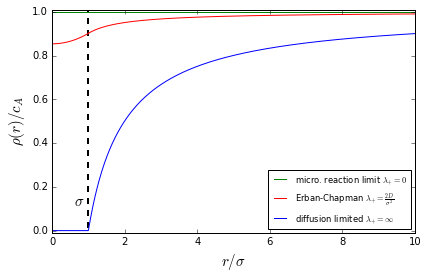

In [12]:
Diffusion=1.0
bincenters=np.linspace(0,10,1001)
reactiondistance=1.0

plt.figure(figsize=(6.5,4))
plt.plot([1.0, 1.0], [-0.1,1.1], 'k--', lw=2)
plt.ylim([-0.01,1.01])




plt.text(0.9, 0.1, '$\\sigma$',verticalalignment='bottom', horizontalalignment='right', fontsize=15)


micro_reactionrate_forward=0.0001

plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="g", label="micro. reaction limit $\\lambda_{+} = 0$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="g")



micro_reactionrate_forward=1./3.


plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="r", label="Erban-Chapman $\\lambda_{+}=\\frac{2D}{\\sigma^2}$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="r")
plt.xlabel('$r / \\sigma$ ', fontsize=15)
plt.ylabel('$\\rho(r)/c_A$', fontsize=15)





micro_reactionrate_forward=100000

plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="b", label="diffusion limited $\\lambda_{+}= \\infty$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="b")




plt.legend(loc=4,fontsize="small")
plt.savefig('results/smoluchowskierban.png',dpi=300)  
plt.show()

# Analysis Protokoll

In [2]:
particlenumber=20
boxsize=8.0
D=1.0/6.0
R=1.0
alpha=1.0
lambda_plus=1.0
lambda_c=1.0
lambda_minus=1.0
length=2**14
tau=0.05

(4, 16385) das ist die Anzahl der Trajektorien mal die Laenge der Trajektorien
2.7009643779 2.57124502391 2.5693317364
2.5693317364
[-0.06314345] das ist h
2.5693317364 k_0
1.0 das ist alpha
2.5693317364 k_0
1.0 das ist alpha


/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


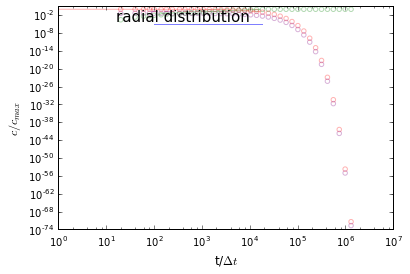

In [6]:
"""
One has to first simualte with simualtion protokoll enough trajectories
"""
for alpha in [1.0]:

    #alpha=1.0
    lambda_c=1.0
    lambda_minus=1.0
    #boxsize=15
    analysis.Analy_Complex(D,R,lambda_plus,lambda_minus,lambda_c,alpha,length,boxsize,particlenumber,tau).show_particle_alpha()
plt.ylabel('$c/c_{max}$', fontsize=12)
plt.xlabel('t/$\Delta t$', fontsize=12)
plt.legend(loc=3)
plt.fill_between(np.linspace(100,18000),0.8*10**(-5), 10**(-5),color='blue', alpha=0.5)
plt.text(10000, 0.1*10**(-4), 'radial distribution',
        verticalalignment='bottom', horizontalalignment='right', fontsize=15)
#plt.savefig('./Abschlussarbeit/data/normal-scenario-concentrations',dpi=300)
plt.show()

(4, 16385) das ist die Anzahl der Trajektorien mal die Laenge der Trajektorien
2.7009643779 2.57124502391 2.5693317364
2.5693317364
[-0.06314345] das ist h
2.5693317364 k_0
1.0 das ist alpha
2.5693317364 k_0
1.0 das ist alpha
(4, 16385) das ist die Anzahl der Trajektorien mal die Laenge der Trajektorien
2.7009643779 2.57124502391 2.5693317364
2.5693317364
[-0.06314345] das ist h
2.5693317364 k_0
1.0 das ist alpha
2.5693317364 k_0
1.0 das ist alpha


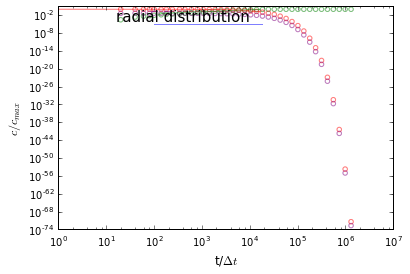

In [9]:
"""
One has to first simualte with simualtion protokoll enough trajectories
"""
for alpha in [1.0]:

    #alpha=1.0
    lambda_c=1.0
    lambda_minus=1.0
    #boxsize=15
    ana=analysis.Analy_Complex(D,R,lambda_plus,lambda_minus,lambda_c,alpha,length,boxsize,particlenumber,tau)
    ana.k1_alpha_0=analysis.Analy_Complex(D,R,lambda_plus,lambda_minus,lambda_c,alpha,length,boxsize,particlenumber,tau).show_particle_alpha()

    ana.show_particle_alpha()
    plt.ylabel('$c/c_{max}$', fontsize=12)
plt.xlabel('t/$\Delta t$', fontsize=12)
plt.legend(loc=3)
plt.fill_between(np.linspace(100,18000),0.8*10**(-5), 10**(-5),color='blue', alpha=0.5)
plt.text(10000, 0.1*10**(-4), 'radial distribution',
        verticalalignment='bottom', horizontalalignment='right', fontsize=15)
#plt.savefig('./Abschlussarbeit/data/normal-scenario-concentrations',dpi=300)
plt.show()


Mean kpluscount= 3.79077332123
std of Mean kpluscount= 0.61669938578
1.0 das ist h
3.84930479037 k_0
1.0 das ist alpha
erban chapmann:k1= 1.2520147195
fitted k1 2.57124502391


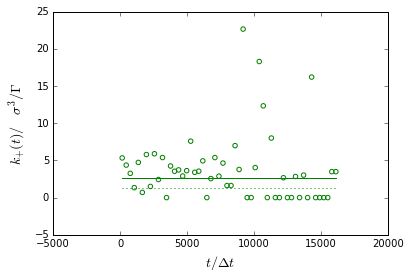

In [10]:
ana.show_k1_better()
plt.ylabel('$k_{+}(t)/ \quad \sigma^3/ \Gamma$', fontsize=14)
plt.xlabel('$t/ \Delta t$', fontsize=14)
plt.legend(loc=3,fontsize='small')
#plt.k1_better(np.linspace(100/20,18000/20),0.8*10**(-5), 10**(-5),color='blue', alpha=0.5)


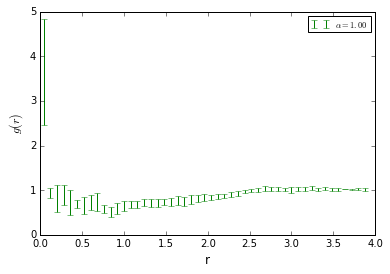

In [11]:
ana.show_radial()
plt.ylabel('$g(r)$', fontsize=12)
plt.xlabel('r', fontsize=12)
plt.legend(loc=1,fontsize='small')

# fracal exponents diffusion limit

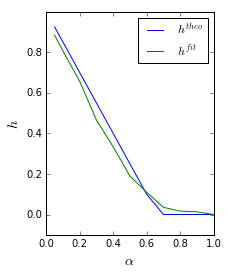

In [9]:
plt.figure(figsize=(3,4))
alpha=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

alpha=np.array(alpha)
h=1-(3.0*alpha)/2.0 # from perculation theory (Koppelman)
hfit=[0.88441,0.80584,0.65659,0.46603,0.33364,0.18971,0.10969,0.03544,0.01657, 0.01320, 0.0] # from results of simulation protokoll
h[-4:]=[0,0,0,0]
plt.plot(alpha,h,label='$h^{theo}$')
plt.plot(alpha,hfit,label='$h^{fit}$')
plt.xlabel('$\\alpha$ ', fontsize=14)
plt.ylabel('$h$', fontsize=14)
plt.ylim((-0.1,1.0))
lgd=plt.legend(loc=1)
plt.savefig('results/fractal_exponents.png',dpi=300)  
